In [40]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_spatial=np.load('full_spatial_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))



from sklearn.decomposition import PCA


sil=dict()
sil[512]=[]
sil[1024]=[]
sil[2048]=[]
sil[4096]=[]

cal=dict()
cal[512]=[]
cal[1024]=[]
cal[2048]=[]
cal[4096]=[]

dav=dict()
dav[512]=[]
dav[1024]=[]
dav[2048]=[]
dav[4096]=[]

ns_clusters_=[x for x in range(50,200,25)]+[x for x in range(200,400,50)]+[x for x in range(400,800,100)]+[x for x in range(800,2000,200)]+[x for x in range(2000,4000,400)]+[x for x in range(4000,8000,800)]+[8000,9300]#np.arange(100,9400,100)

for n_pca in (512,1024,2048,4096):
    pca = PCA(n_components=n_pca, svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    connectivity = grid_to_graph(n_x=nx, n_y=ny)
    for n_clusters_ in ns_clusters_:
        ward = cluster.AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)
        labels = ward.labels_
        #sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
        sil[n_pca].append(metrics.silhouette_score(pca_features,labels))
        cal[n_pca].append(metrics.calinski_harabasz_score(pca_features,labels))
        dav[n_pca].append(metrics.davies_bouldin_score(pca_features,labels))
        np.save("sil%i"%n_pca,sil[n_pca])
        np.save("cal%i"%n_pca,cal[n_pca])
        np.save("dav%i"%n_pca,dav[n_pca])


Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ..\lauetools\LaueTools
you are using python 3


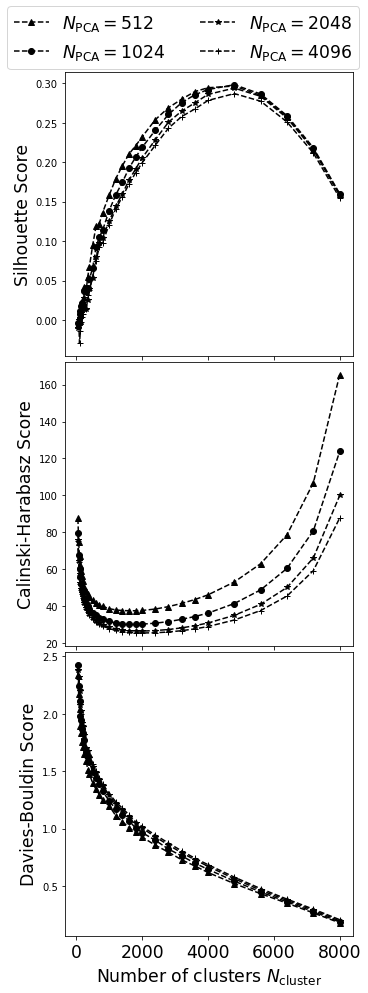

In [51]:
#import numpy as np
#import matplotlib.pyplot as plt

#sil=np.load('sil.npy',allow_pickle=True)
#cal=np.load('cal.npy',allow_pickle=True)
#dav=np.load('dav.npy',allow_pickle=True)


ns_clusters_=[x for x in range(50,200,25)]+[x for x in range(200,400,50)]+[x for x in range(400,800,100)]+[x for x in range(800,2000,200)]+[x for x in range(2000,4000,400)]+[x for x in range(4000,8000,800)]+[8000,9300]#np.arange(100,9400,100)

ns_clusters_=ns_clusters_[:-1]

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=3, ncols=1, left=0, right=1./3,bottom=0,top=1., wspace=0.002,hspace=0.02)#,sharex=True)

#ns_pca=(512,1024,2048,4096)


ax1 = fig.add_subplot(gs[0,0])
t1,=ax1.plot(ns_clusters_,np.load('sil512.npy')[:-1],'k^--')
t2,=ax1.plot(ns_clusters_,np.load('sil1024.npy')[:-1],'ko--')
t3,=ax1.plot(ns_clusters_,np.load('sil2048.npy')[:-1],'k*--')
t4,=ax1.plot(ns_clusters_,np.load('sil4096.npy')[:-1],'k+--')

ax1.legend([t1,t2,t3,t4],["$N_{\mathrm{PCA}}=512$","$N_{\mathrm{PCA}}=1024$","$N_{\mathrm{PCA}}=2048$","$N_{\mathrm{PCA}}=4096$"],fontsize='xx-large',ncol=2,loc=(-0.2,1.01))
#ax1.text("(a)")

ax1.set_ylabel("Silhouette Score",size='xx-large')


ax2 = fig.add_subplot(gs[1,0], sharex=ax1)
t1,=ax2.plot(ns_clusters_,np.load('cal512.npy')[:-1],'k^--')
t2,=ax2.plot(ns_clusters_,np.load('cal1024.npy')[:-1],'ko--')
t3,=ax2.plot(ns_clusters_,np.load('cal2048.npy')[:-1],'k*--')
t4,=ax2.plot(ns_clusters_,np.load('cal4096.npy')[:-1],'k+--')

#ax2.legend([t1,t2,t3,t4],["$N_{\mathrm{PCA}}=512$","$N_{\mathrm{PCA}}=1024$","$N_{\mathrm{PCA}}=2048$","$N_{\mathrm{PCA}}=4096$"],fontsize='xx-large',ncol=2,loc='upper right')#loc=(-0.,1.01))
#ax1.text("(a)")
ax2.set_ylabel("Calinski-Harabasz Score",size='xx-large')
#ax2.tick_params(labelbottom=False)


ax3 = fig.add_subplot(gs[2,0], sharex=ax1)
t1,=ax3.plot(ns_clusters_,np.load('dav512.npy')[:-1],'k^--')
t2,=ax3.plot(ns_clusters_,np.load('dav1024.npy')[:-1],'ko--')
t3,=ax3.plot(ns_clusters_,np.load('dav2048.npy')[:-1],'k*--')
t4,=ax3.plot(ns_clusters_,np.load('dav4096.npy')[:-1],'k+--')
ax3.set_ylabel("Davies-Bouldin Score",size='xx-large')

#ax3.legend([t1,t2,t3,t4],["$N_{\mathrm{PCA}}=512$","$N_{\mathrm{PCA}}=1024$","$N_{\mathrm{PCA}}=2048$","$N_{\mathrm{PCA}}=4096$"],fontsize='xx-large',ncol=2,loc='upper right')#loc=(-0.,1.01))
#ax1.text("(a)")

ax3.tick_params(axis='x', labelsize= "xx-large")
ax3.set_xticks([0,2000,4000,6000,8000])
ax3.set_xlabel("Number of clusters $N_{\mathrm{cluster}}$",size='xx-large')

#plt.savefig('fig10.tif',format='tif',bbox_inches ='tight')

In [1]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_spatial=np.load('full_spatial_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))



from sklearn.decomposition import PCA


sil=dict()
sil[32]=[]
sil[64]=[]
sil[128]=[]
sil[256]=[]

cal=dict()
cal[32]=[]
cal[64]=[]
cal[128]=[]
cal[256]=[]

dav=dict()
dav[32]=[]
dav[64]=[]
dav[128]=[]
dav[256]=[]

ns_clusters_=[x for x in range(50,200,25)]+[x for x in range(200,400,50)]+[x for x in range(400,800,100)]+[x for x in range(800,2000,200)]+[x for x in range(2000,4000,400)]+[x for x in range(4000,8000,800)]+[8000,9300]#np.arange(100,9400,100)

for n_pca in (32,64,128,256):
    pca = PCA(n_components=n_pca, svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    connectivity = grid_to_graph(n_x=nx, n_y=ny)
    for n_clusters_ in ns_clusters_:
        ward = cluster.AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)
        labels = ward.labels_
        #sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
        sil[n_pca].append(metrics.silhouette_score(pca_features,labels))
        cal[n_pca].append(metrics.calinski_harabasz_score(pca_features,labels))
        dav[n_pca].append(metrics.davies_bouldin_score(pca_features,labels))
        np.save("sil%i"%n_pca,sil[n_pca])
        np.save("cal%i"%n_pca,cal[n_pca])
        np.save("dav%i"%n_pca,dav[n_pca])

Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ..\lauetools\LaueTools
you are using python 3


Text(0.5, 0, 'Number of clusters $N_{\\mathrm{cluster}}$')

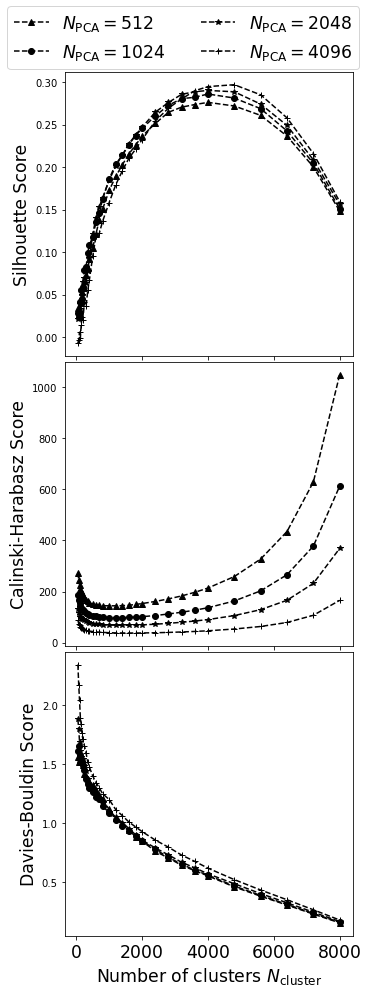

In [2]:
#import numpy as np
#import matplotlib.pyplot as plt

#sil=np.load('sil.npy',allow_pickle=True)
#cal=np.load('cal.npy',allow_pickle=True)
#dav=np.load('dav.npy',allow_pickle=True)


ns_clusters_=[x for x in range(50,200,25)]+[x for x in range(200,400,50)]+[x for x in range(400,800,100)]+[x for x in range(800,2000,200)]+[x for x in range(2000,4000,400)]+[x for x in range(4000,8000,800)]+[8000,9300]#np.arange(100,9400,100)

ns_clusters_=ns_clusters_[:-1]

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=3, ncols=1, left=0, right=1./3,bottom=0,top=1., wspace=0.002,hspace=0.02)#,sharex=True)

#ns_pca=(512,1024,2048,4096)


ax1 = fig.add_subplot(gs[0,0])
t1,=ax1.plot(ns_clusters_,np.load('sil32.npy')[:-1],'k^--')
t2,=ax1.plot(ns_clusters_,np.load('sil64.npy')[:-1],'ko--')
t3,=ax1.plot(ns_clusters_,np.load('sil128.npy')[:-1],'k*--')
t4,=ax1.plot(ns_clusters_,np.load('sil512.npy')[:-1],'k+--')

ax1.legend([t1,t2,t3,t4],["$N_{\mathrm{PCA}}=512$","$N_{\mathrm{PCA}}=1024$","$N_{\mathrm{PCA}}=2048$","$N_{\mathrm{PCA}}=4096$"],fontsize='xx-large',ncol=2,loc=(-0.2,1.01))
#ax1.text("(a)")

ax1.set_ylabel("Silhouette Score",size='xx-large')


ax2 = fig.add_subplot(gs[1,0], sharex=ax1)
t1,=ax2.plot(ns_clusters_,np.load('cal32.npy')[:-1],'k^--')
t2,=ax2.plot(ns_clusters_,np.load('cal64.npy')[:-1],'ko--')
t3,=ax2.plot(ns_clusters_,np.load('cal128.npy')[:-1],'k*--')
t4,=ax2.plot(ns_clusters_,np.load('cal512.npy')[:-1],'k+--')

#ax2.legend([t1,t2,t3,t4],["$N_{\mathrm{PCA}}=512$","$N_{\mathrm{PCA}}=1024$","$N_{\mathrm{PCA}}=2048$","$N_{\mathrm{PCA}}=4096$"],fontsize='xx-large',ncol=2,loc='upper right')#loc=(-0.,1.01))
#ax1.text("(a)")
ax2.set_ylabel("Calinski-Harabasz Score",size='xx-large')
#ax2.tick_params(labelbottom=False)


ax3 = fig.add_subplot(gs[2,0], sharex=ax1)
t1,=ax3.plot(ns_clusters_,np.load('dav32.npy')[:-1],'k^--')
t2,=ax3.plot(ns_clusters_,np.load('dav64.npy')[:-1],'ko--')
t3,=ax3.plot(ns_clusters_,np.load('dav128.npy')[:-1],'k*--')
t4,=ax3.plot(ns_clusters_,np.load('dav512.npy')[:-1],'k+--')
ax3.set_ylabel("Davies-Bouldin Score",size='xx-large')

#ax3.legend([t1,t2,t3,t4],["$N_{\mathrm{PCA}}=512$","$N_{\mathrm{PCA}}=1024$","$N_{\mathrm{PCA}}=2048$","$N_{\mathrm{PCA}}=4096$"],fontsize='xx-large',ncol=2,loc='upper right')#loc=(-0.,1.01))
#ax1.text("(a)")

ax3.tick_params(axis='x', labelsize= "xx-large")
ax3.set_xticks([0,2000,4000,6000,8000])
ax3.set_xlabel("Number of clusters $N_{\mathrm{cluster}}$",size='xx-large')

#plt.savefig('fig10.tif',format='tif',bbox_inches ='tight')

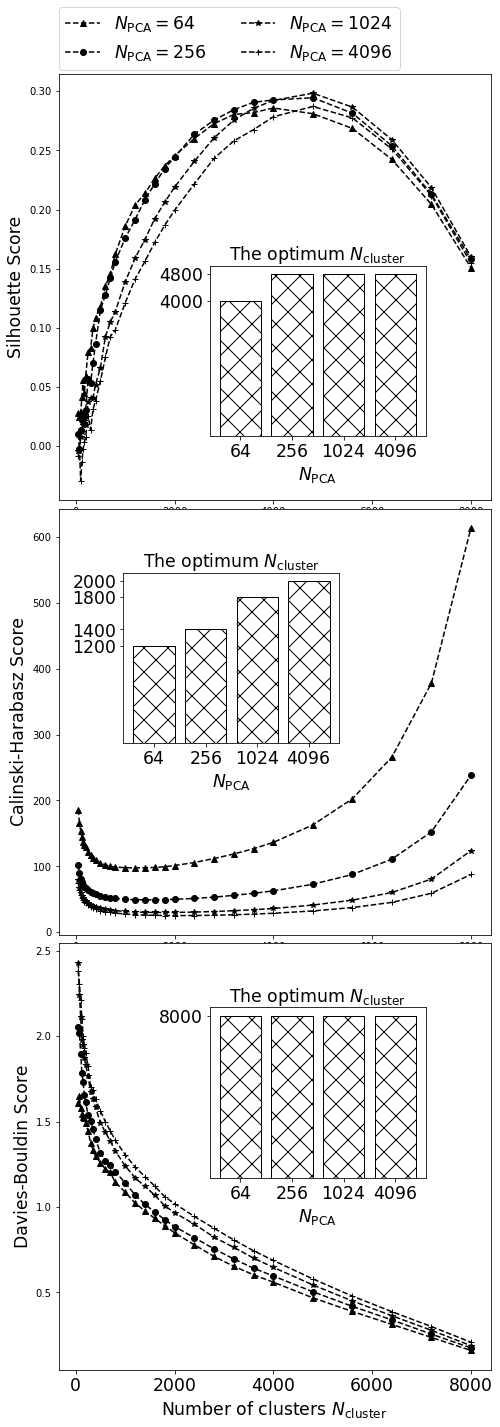

In [61]:
#import numpy as np
#import matplotlib.pyplot as plt

#sil=np.load('sil.npy',allow_pickle=True)
#cal=np.load('cal.npy',allow_pickle=True)
#dav=np.load('dav.npy',allow_pickle=True)


ns_clusters_=[x for x in range(50,200,25)]+[x for x in range(200,400,50)]+[x for x in range(400,800,100)]+[x for x in range(800,2000,200)]+[x for x in range(2000,4000,400)]+[x for x in range(4000,8000,800)]+[8000,9300]#np.arange(100,9400,100)

ns_clusters_=ns_clusters_[:-1]

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=3, ncols=1, left=0, right=0.5,bottom=0,top=1.5, wspace=0.002,hspace=0.02)#,sharex=True)

#ns_pca=(512,1024,2048,4096)


ax1 = fig.add_subplot(gs[0,0])
t1,=ax1.plot(ns_clusters_,np.load('sil64.npy')[:-1],'k^--')
t2,=ax1.plot(ns_clusters_,np.load('sil256.npy')[:-1],'ko--')
t3,=ax1.plot(ns_clusters_,np.load('sil1024.npy')[:-1],'k*--')
t4,=ax1.plot(ns_clusters_,np.load('sil4096.npy')[:-1],'k+--')

#ax1.text(0,0,'jhgiu\n sdfsdf',size='xx-large')

axins = ax1.inset_axes([0.35, 0.15, 0.5, 0.4])
axins.set_title("The optimum $N_{\mathrm{cluster}}$",size='xx-large')
axins.set_xlabel("$N_{\mathrm{PCA}}$",size='xx-large')

axins.set_yticks([4000,4800])

axins.bar([1,2,3,4],
          [ns_clusters_[np.argmax(np.array(np.load('sil64.npy')))] , 
           ns_clusters_[np.argmax(np.array(np.load('sil256.npy')))], 
           ns_clusters_[np.argmax(np.array(np.load('sil1024.npy')))], 
           ns_clusters_[np.argmax(np.array(np.load('sil4096.npy')))]],
           tick_label=["$64$","$256$","$1024$","$4096$"],
         color='white',edgecolor='black',hatch='x')


axins.tick_params(axis='x', labelsize= "xx-large")
axins.tick_params(axis='y', labelsize= "xx-large")

ax1.legend([t1,t2,t3,t4],["$N_{\mathrm{PCA}}=64$","$N_{\mathrm{PCA}}=256$","$N_{\mathrm{PCA}}=1024$","$N_{\mathrm{PCA}}=4096$"],fontsize='xx-large',ncol=2,loc=(0,1.01))
#ax1.text("(a)")

ax1.set_ylabel("Silhouette Score",size='xx-large')


ax2 = fig.add_subplot(gs[1,0], sharex=ax1)
t1,=ax2.plot(ns_clusters_,np.load('cal64.npy')[:-1],'k^--')
t2,=ax2.plot(ns_clusters_,np.load('cal256.npy')[:-1],'ko--')
t3,=ax2.plot(ns_clusters_,np.load('cal1024.npy')[:-1],'k*--')
t4,=ax2.plot(ns_clusters_,np.load('cal4096.npy')[:-1],'k+--')


axins = ax2.inset_axes([0.15, 0.45, 0.5, 0.4])
axins.set_title("The optimum $N_{\mathrm{cluster}}$",size='xx-large')
axins.set_xlabel("$N_{\mathrm{PCA}}$",size='xx-large')

axins.set_yticks([1200,1400,1800,2000])

axins.bar([1,2,3,4],
          [ns_clusters_[np.argmin(np.array(np.load('cal64.npy')))] , 
           ns_clusters_[np.argmin(np.array(np.load('cal256.npy')))], 
           ns_clusters_[np.argmin(np.array(np.load('cal1024.npy')))], 
           ns_clusters_[np.argmin(np.array(np.load('cal4096.npy')))]],
          tick_label=["$64$","$256$","$1024$","$4096$"],
         color='white',edgecolor='black',hatch='x')


axins.tick_params(axis='x', labelsize= "xx-large")
axins.tick_params(axis='y', labelsize= "xx-large")

#ax2.legend([t1,t2,t3,t4],["$N_{\mathrm{PCA}}=512$","$N_{\mathrm{PCA}}=1024$","$N_{\mathrm{PCA}}=2048$","$N_{\mathrm{PCA}}=4096$"],fontsize='xx-large',ncol=2,loc='upper right')#loc=(-0.,1.01))
#ax1.text("(a)")
ax2.set_ylabel("Calinski-Harabasz Score",size='xx-large')
#ax2.tick_params(labelbottom=False)


ax3 = fig.add_subplot(gs[2,0], sharex=ax1)
t1,=ax3.plot(ns_clusters_,np.load('dav64.npy')[:-1],'k^--')
t2,=ax3.plot(ns_clusters_,np.load('dav256.npy')[:-1],'ko--')
t3,=ax3.plot(ns_clusters_,np.load('dav1024.npy')[:-1],'k*--')
t4,=ax3.plot(ns_clusters_,np.load('dav4096.npy')[:-1],'k+--')
ax3.set_ylabel("Davies-Bouldin Score",size='xx-large')

axins = ax3.inset_axes([0.35, 0.45, 0.5, 0.4])
axins.set_title("The optimum $N_{\mathrm{cluster}}$",size='xx-large')
axins.set_xlabel("$N_{\mathrm{PCA}}$",size='xx-large')

axins.set_yticks([8000])

axins.bar([1,2,3,4],
          4*[8000],
           tick_label=["$64$","$256$","$1024$","$4096$"],
         color='white',edgecolor='black',hatch='x')


axins.tick_params(axis='x', labelsize= "xx-large")
axins.tick_params(axis='y', labelsize= "xx-large")

#ax3.legend([t1,t2,t3,t4],["$N_{\mathrm{PCA}}=512$","$N_{\mathrm{PCA}}=1024$","$N_{\mathrm{PCA}}=2048$","$N_{\mathrm{PCA}}=4096$"],fontsize='xx-large',ncol=2,loc='upper right')#loc=(-0.,1.01))
#ax1.text("(a)")

ax3.tick_params(axis='x', labelsize= "xx-large")
ax3.set_xticks([0,2000,4000,6000,8000])
ax3.set_xlabel("Number of clusters $N_{\mathrm{cluster}}$",size='xx-large')

plt.savefig('fig10.tif',format='tif',bbox_inches ='tight')

In [6]:
ns_clusters_=[x for x in range(50,200,25)]+[x for x in range(200,400,50)]+[x for x in range(400,800,100)]+[x for x in range(800,2000,200)]+[x for x in range(2000,4000,400)]+[x for x in range(4000,8000,800)]+[8000,9300]#np.arange(100,9400,100)

for i in (32,64,256,1024,4096):
    curve=np.array(np.load('sil%i.npy'%i))
    print(ns_clusters_[np.argmax(curve)])

for i in (32,64,256,1024,4096):
    curve=np.array(np.load('cal%i.npy'%i))
    print(ns_clusters_[np.argmin(curve)])

4000
4000
4800
4800
4800
1200
1200
1400
1800
2000
